>epoch=0, lrate=0.500, error=6.580
>epoch=1, lrate=0.500, error=6.171
>epoch=2, lrate=0.500, error=5.820
>epoch=3, lrate=0.500, error=5.554
>epoch=4, lrate=0.500, error=5.374
>epoch=5, lrate=0.500, error=5.263
>epoch=6, lrate=0.500, error=5.200
>epoch=7, lrate=0.500, error=5.167
>epoch=8, lrate=0.500, error=5.149
>epoch=9, lrate=0.500, error=5.141
>epoch=10, lrate=0.500, error=5.137
>epoch=11, lrate=0.500, error=5.136
>epoch=12, lrate=0.500, error=5.136
>epoch=13, lrate=0.500, error=5.136
>epoch=14, lrate=0.500, error=5.137
>epoch=15, lrate=0.500, error=5.137
>epoch=16, lrate=0.500, error=5.137
>epoch=17, lrate=0.500, error=5.138
>epoch=18, lrate=0.500, error=5.138
>epoch=19, lrate=0.500, error=5.138
[{'weights': [0.13436424411240122, 0.8474337369372327, 0.6914200347752649], 'inputs': [0, 0], 'output': 0.9909519765923831, 'delta': -0.0006931244591750442}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.30685447849638353], 'inputs': [0, 0], 'output': 0.9820573603713997, 'delta':

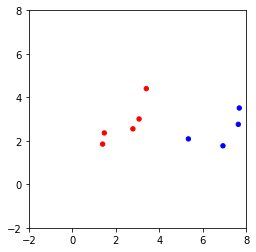

In [3]:
import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)],
                     'inputs':[0 for i in range(n_inputs)], 'output':0, 'delta':0} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)],
                     'inputs':[0 for i in range(n_hidden)], 'output':0, 'delta':0} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Calculate neuron activation for an input
def activate(neuron):
	activation = neuron['weights'][-1]
	for i in range(len(neuron['weights'])-1):
		activation += neuron['weights'][i] * neuron['inputs'][i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Calculate the derivative of an neuron output
def transfer_derivative(neuron):
	return neuron['output'] * (1.0 - neuron['output'])


# Calculate the derivative of the activation function
def activation_derivate_by_input(neuron, idx):
    return neuron['weights'][idx]

def activation_derivate_by_weight(neuron, idx):
    return neuron['inputs'][idx]

# Forward propagate input to a network output
def forward_propagate(network, row):
	for neuron in network[0]:
        for i in range(len(row)):
            neuron['inputs'][i] = row[i]
            
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (activation_derivate_by_input(neuron, j) * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron)
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * activation_derivate_by_weight(neuron, j)
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 
# Test training backprop algorithm
seed(1)
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(T[0]) - 1
n_outputs = len(set([row[-1] for row in T]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, T, 0.5, 20, n_outputs)
for layer in network:
	print(layer)
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
plt.xlim( -2 ,8 ) 
plt.ylim( -2 , 8) 
for i in range(len(T)):
    cl = 'blue' if T[i][2] > 0 else 'red'
    cc = plt.Circle( (T[i][0], T[i][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)     
